# Processamento dos Dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import import_ipynb
import services.especialidades as esp
import datetime
import math
import services.function as fc

importing Jupyter notebook from C:\Users\jeanc\Documentos\GitHub\project_dataScience_POSCOMP\services\especialidades.ipynb


## POSCOMP

### Dados da Homologação do POSCOMP

In [2]:
dados_homologados = pd.read_csv('dados/homologacao_poscomp/dados_homologados.csv')

In [3]:
dados_homologados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14575 entries, 0 to 14574
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   INSCRICAO   14575 non-null  object
 1   DATA NASC.  14575 non-null  object
 2   SEXO        14575 non-null  object
 3   ESTADO      14575 non-null  object
 4   ANO         14575 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 569.5+ KB


In [4]:
# elimina dados pertecentes ao Peru
dados_homologados = dados_homologados.loc[(dados_homologados['ESTADO']) != 'OU']

<Axes: xlabel='ANO'>

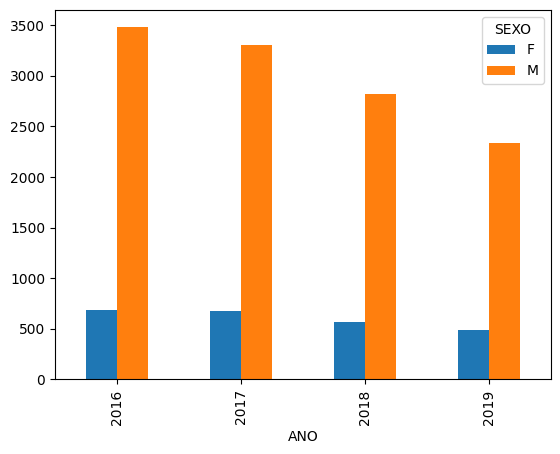

In [5]:
ano = [2016,2017,2018,2019]
dados_homologados.groupby('SEXO')['ANO'].value_counts().unstack(0).loc[ano].plot.bar()

<Axes: >

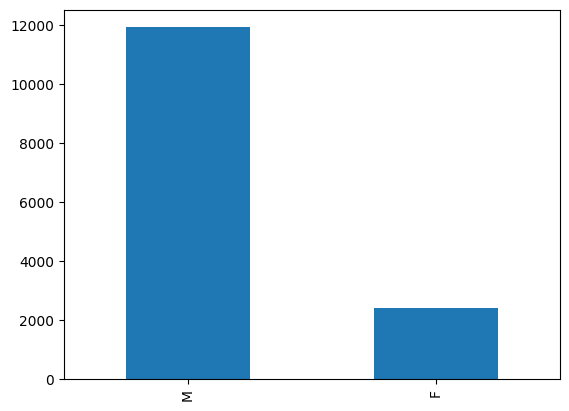

In [6]:
dados_homologados['SEXO'].value_counts().plot.bar()

In [7]:
dados_homologados = dados_homologados.set_index('INSCRICAO')

In [8]:
dados_homologados.drop(['688145', 'miamia'], inplace=True)

### Dados das Notas do POSCOMP

In [9]:
from textwrap import wrap

In [10]:
dados_notasRespostas = pd.read_csv('dados/notas_poscomp/dados_notasRespostas.csv')

In [11]:
dados_notasRespostas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79479 entries, 0 to 79478
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   INSCRICAO                                        79479 non-null  object 
 1   ESPECIALIDADE                                    78605 non-null  object 
 2   PRESENTE DIA1                                    79479 non-null  object 
 3   CARGO                                            79479 non-null  object 
 4   Matemática Discreta                              64543 non-null  float64
 5   Cálculo Diferencial e Integral                   64543 non-null  float64
 6   Álgebra Linear                                   64543 non-null  float64
 7   Geometria Analítica                              64543 non-null  float64
 8   Análise Combinatória                             64543 non-null  float64
 9   Probabilidade e Estatística 

### Realizar estudos por Regiões do Brasil

In [12]:
dados_homologados_cp = dados_homologados.copy()

In [13]:
dados_homologados['ESTADO'].unique()

array(['CE', 'RS', 'SP', 'PA', 'MT', 'AM', 'MS', 'PB', 'GO', 'RN', 'PR',
       'MG', 'SE', 'PE', 'ES', 'BA', 'RJ', 'AL', 'SC', 'MA', 'PI', 'DF',
       'RO', 'TO', 'RR', 'AP', 'AC'], dtype=object)

In [14]:
import services.lista_estados_regioes as lesr

importing Jupyter notebook from C:\Users\jeanc\Documentos\GitHub\project_dataScience_POSCOMP\services\lista_estados_regioes.ipynb


In [15]:
#Aqui estou adicionando as regioes dos estados brasileiros
for i in lesr.regioes_brasil_siglas:
    dados_homologados.loc[dados_homologados['ESTADO'].isin(lesr.regioes_brasil_siglas[i]), 'REGIAO'] = i

In [16]:
dados_homologados = dados_homologados.dropna()

In [17]:
dados_homologados.head()

,DATA NASC.,SEXO,ESTADO,ANO,REGIAO
INSCRICAO,,,,,
39401645886-1,29/11/1989,M,CE,2016,nordeste
39401663587-8,23/02/1995,M,RS,2016,sul
39401651770-6,13/12/1991,M,SP,2016,sudeste
39401671273-0,29/09/1986,M,PA,2016,norte
39402640298-8,26/11/1991,M,MT,2016,centro_oeste


### Converter as data de nascimento por idade

In [18]:
def age(idade):
    idade = datetime.strptime(idade, "%d/%m/%Y").date()
    today = date.today()
    return today.year - idade.year - ((today.month, today.day) < (idade.month, idade.day))

# df['Age'] = df['DOB'].apply(age)

In [19]:
from datetime import datetime, date

dados_homologados['IDADE'] = dados_homologados['DATA NASC.'].apply(age)

In [20]:
dados_homologados = dados_homologados.drop(columns=['DATA NASC.'])
dados_homologados.head()

,SEXO,ESTADO,ANO,REGIAO,IDADE
INSCRICAO,,,,,
39401645886-1,M,CE,2016,nordeste,33
39401663587-8,M,RS,2016,sul,28
39401651770-6,M,SP,2016,sudeste,31
39401671273-0,M,PA,2016,norte,36
39402640298-8,M,MT,2016,centro_oeste,31


### Juntar os dataframes

In [21]:
dados_homologados.shape

(14344, 5)

In [22]:
dados_homologados.info()
dados_homologados = dados_homologados.drop(columns=['ANO'])

<class 'pandas.core.frame.DataFrame'>
Index: 14344 entries, 39401645886-1 to 51801366900-3
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SEXO    14344 non-null  object
 1   ESTADO  14344 non-null  object
 2   ANO     14344 non-null  int64 
 3   REGIAO  14344 non-null  object
 4   IDADE   14344 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 672.4+ KB


In [23]:
# dados_respostas.info()
# dados_respostas = dados_respostas.drop(columns=['ANO'])

In [24]:
dados_notasRespostas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79479 entries, 0 to 79478
Data columns (total 30 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   INSCRICAO                                        79479 non-null  object 
 1   ESPECIALIDADE                                    78605 non-null  object 
 2   PRESENTE DIA1                                    79479 non-null  object 
 3   CARGO                                            79479 non-null  object 
 4   Matemática Discreta                              64543 non-null  float64
 5   Cálculo Diferencial e Integral                   64543 non-null  float64
 6   Álgebra Linear                                   64543 non-null  float64
 7   Geometria Analítica                              64543 non-null  float64
 8   Análise Combinatória                             64543 non-null  float64
 9   Probabilidade e Estatística 

In [25]:
data_poscomp = pd.merge(dados_homologados, dados_notasRespostas, how='inner', on='INSCRICAO')

In [26]:
data_poscomp.shape

(77773, 34)

In [27]:
data_poscomp = data_poscomp.drop_duplicates(subset='INSCRICAO', keep='first')

In [28]:
data_poscomp = data_poscomp.query("ESPECIALIDADE.notnull()")

# Tratamento da especilidade dos candidatos

In [29]:
# Converter todos os elementos para minúsculas
data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].str.lower()

In [30]:
import re

# definir uma expressão regular para encontrar os caracteres '?'
def substituir_caracteres(df, caractere):
    regex = r'\b{}\b'.format(re.escape(caractere))

    # substituir os caracteres '?' por um caractere vazio em todas as linhas da coluna 'Texto'
    df['ESPECIALIDADE'] = df['ESPECIALIDADE'].apply(lambda x: re.sub(regex, '', x))
    
    return df

In [31]:
def remover_e(frase):
    if frase.endswith(" e"):
        frase = frase.rstrip(" e")
    # if frase.endswith(" a"):
    #     frase = frase.rstrip(" a")
    return frase

# # Aplicar a função em uma coluna do DataFrame
# dados_disciplinas['ESPECIALIDADE'] = dados_disciplinas['ESPECIALIDADE'].apply(remover_e)

In [32]:
def substituir_palavras(df, palavras_a_substituir, palavra_substituta):
    # Para cada palavra a ser substituída
    for palavra in palavras_a_substituir:
        # Use uma expressão regular para encontrar a palavra inteira e aplicar a substituição
        padrao = r'\b' + re.escape(palavra) + r'\b'
        df['ESPECIALIDADE'] = df['ESPECIALIDADE'].str.replace(padrao, palavra_substituta, regex=True)

    # Retorna o novo DataFrame com as palavras substituídas
    return df

In [33]:
data_poscomp = substituir_caracteres(data_poscomp, '?',)
data_poscomp = substituir_caracteres(data_poscomp, '\\')
# dataset_analise = substituir_caracteres(dataset_analise, ' \')
data_poscomp = substituir_caracteres(data_poscomp, '\ ')


# Remover caracteres "\\"
data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].str.replace(r'\\', '')
data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].str.replace(r' à', '')
data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].str.replace(r'.', '')
data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].str.replace(r':', '')

C:\Users\jeanc\AppData\Local\Temp\ipykernel_18268\2960417987.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].str.replace(r'\\', '')
C:\Users\jeanc\AppData\Local\Temp\ipykernel_18268\2960417987.py:10: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].str.replace(r'.', '')


In [34]:
# buscando as três primeiras palavras de cada texto sem as vírgulas
primeiras_palavras = data_poscomp['ESPECIALIDADE'].str.split().apply(lambda x: x[:3])

# adicionando as palavras como uma nova coluna no dataframe
data_poscomp['ESPECIALIDADE'] = primeiras_palavras

# removendo as vírgulas da coluna 'Primeiras Palavras'
data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].apply(lambda x: ' '.join(word.replace(',', '') for word in x))

# imprimindo o dataframe resultante

In [35]:
data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].apply(remover_e)

In [36]:
data_poscomp = substituir_palavras(data_poscomp, [
 'matemática e inteligência',
 'inteligência computacional',
 'otimização e inteligência',
 'lógica inteligência artificial',
 'inteligência aplicada',
 'outrasinteligência artificial',
 'sistemas de inteligência',
 'inteligência e modelagem',
 'outras inteligência artificial',
    'computação inteligente',
    'inferência em dados',
    'agentes de software',
    'inteligencia computacional',
    'sistemas inteligentes',
    'sistemas multiagentes',
    'inteligência artificial aplicada',
    'inteligencia artificial',
    'redes neuronais artificiais',
    'redes neurais',
    'recuperação e tratamento',
    'automação e robótica',
 'robótica cooperativa',
 'robótica e automação',
 'robótica coletiva',
    'representação de conhecimento', 'representação do conhecimento',
    'robótica móvel',
    'agentes inteligentes',
    'métodos baseados em',
    'máquinas virtuais',
'árvores de decisão'
], "inteligência artificial")

In [37]:
# data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].replace({'desenvolvimento':'engenharia de software'})

In [38]:
data_poscomp = substituir_palavras(data_poscomp, [
'elaboração de software',
 'desenvolvimento de software',
 'qualidade de software',
    'métricas de software',
 'teste de software',
    'sistemas de software',
    'engenharia da informação',
    'sistemas web',
    'processo de desenvolvimento',
 'processos de desenvolvimento',
 'melhoria de processo',
    'controle da qualidade',
    'projeto e teste',
 'verificação e teste',
 'teste e confiabilidade',
 'testes baseados em',
    'avaliação de projetos', 'avaliação e melhoria',
    'ambientes de desenvolvimento',
 'desenvolvimento de ferramentas',
    'gerência de desenvolvimento',
    'métodos ágeis',
    'gerência de projetos'
], "engenharia de software")

In [39]:
# data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].replace({'algoritmos': 'sistemas de computação'})

In [40]:
data_poscomp = substituir_palavras(data_poscomp, [
'sistemas de computaçãoredes',
 'sistemas de computaçãomicroeletrônica',
 'sistemas de computaçãosistemas',
 'sistemas de comunicação',
 'sistemas de computaçãoarquitetura',
 'sistemas de computaçãovisualização',
'sistema de computação',
    'sistemas computacionais para',
 'sistemas complexos de',
 'sistemas computacionais',
 'sistemas computacionais complexos',
 'sistemas computacionais embarcados',
 'sistemas complexos adaptativos',
    'sistemas de computação complexos',
 'sistemas de computação embarcados',
    'computação de alto',
    'engenharia de sistemas',
    'projeto de sistemas',
    'engenharia de sistema',
    'segurança em sistemas',
    'desenvolvimento de sistemas',
    'sistemas nebulosos',
    'programação funcional',
    'análise de algoritmos',
 'teoria e algoritmos',
 'algoritimos experimentais',
 'algoritmos e combinatória',
 'novos algoritmos',
 'algoritmos experimentais',
 'algoritmos e complexidade',
 'outrasalgoritmos e combinatória',
 'outras algoritmos',
    'avaliacão de desempenho',
    'ciências de computação',
    'teoria da computação',
    'teoria aplicada computação',
    'teoria da computaçãoanálise',
    'estruturas de dados',
    'analise de desempenho',
    'linguagens formais',
    'computação forense',
    'forense computacional'
], "sistemas de computação")

In [41]:
data_poscomp = substituir_palavras(data_poscomp, [
    'sistemas de informações',
    'ciência computacional',
 'ciência da computação',
    'bancos de dados',
 'banco de dados',
    'web e banco', 'projeto de bancos',
    'sistema de informação',
 'tecnologia da informação',
    'sistemas de informação/computação',
    'metodologia e técnicas',
 'metodologia da computação',
 'metodologias e técnicas',
 'metodologia e tecnicas',
    'fundamentos da computação',
 'fundamentos de computação',
 'fundamentos e métodos',
    'gestão da informação',
    'linguagens de programação',
 'linguagem de programação',
    'algoritmos e grafos',
 'teoria dos grafos',
 'grafos e combinatória',
 'algoritmos grafos',
    'sistemas interativos',
    'gestão da tecnologia',
    'gestão estratégica de',
    'mídia e interação', 'hipertexto e multimídia', 'hipermídia e multimídia',
    'computação orientada a'
    ], "sistemas de informação")

In [42]:
data_poscomp = substituir_palavras(data_poscomp, [
'computação aplicada a',
 'computação aplicadasistemas de',
 'computação aplicadainteligência computacional',
 'computação aplicada sistemas',
 'computação aplicada inteligência',
    'fundamentos matemáticos da',
    'engenharia da computação',
 'engenharia de computadores',
    'segurança e sistemas',
    'controle de sistemas',
     'sistemas de tipos',
 'gestão de sistemas',
 'sistemas de gestão',
 'sistemas de data',
 'controle de sistemas'
 ], 'computação aplicada')

In [43]:
data_poscomp = substituir_palavras(data_poscomp, [
    'computação em nuvem',
    'arquitetura de computadores',
 'arquitetura de sistemas',
 'arquitetura e projeto',
 'modelos e arquiteturas',
 'arquiteturas e algoritmos',
 'modelagem e arquitetura',
 'arquiteturas e redes',
'redes e sistemas',
'redes de comunicação',  
'projeto de redes',      
'distribuição e redes', 
'gerenciamento de redes',
'segurança de redes',    
'segurança em redes',
    'gerência de redes',
    'redes de comunicações',
    'análise de redes',
    'redes de sensores',
    'redes móveis',
    'projeto integrado de',
 'infraestrutura para integração',
 'projetos integrados de',
    'serviços internet escaláveis',
    'hardware e software'
], "redes de computadores")

In [44]:
data_poscomp = substituir_palavras(data_poscomp, [
    'ciência dos dados',
    'mineração de dados', 
    'mineração anális',
    'big data',
    'mineiração de dados',
    'análise de dados',
    'descoberta do conhecimento',
    'visualização da informação',
 'extração de informação',
    'data science',
    'análise de padrões'
    ], "ciência de dados")

In [45]:
# data_poscomp = substituir_palavras(data_poscomp, [
#  'sistemas embarcados evoluídos',
#  'velha-sistemas embarcados'], "sistemas embarcados")

In [46]:
data_poscomp = substituir_palavras(data_poscomp, [
'aprendizado de maquina',
'aprendizagem de maquina',
'aprendizagem de máquina',
'aprendizado automático de',
'sistemas de apoio'], "aprendizado de máquina")

In [47]:
data_poscomp = substituir_palavras(data_poscomp, [
'aplicações distribuídas',
 'computação distribuida',
 'computação distribuída',
 'sistemas distribuidos',
 'algoritmos distribuídos',
'paralelização de algoritmos',
'algoritmos paralelos',
'processamento paralelo',
'computação em nuvem', 'computação em nuvens',
'cloud computing',
'escalabilidade e eficiência',
'internet e web','middleware e objetos',
'computação paralela',
'sistemas paralelos',
'computação móvel',
'gerenciamento de recursos'], "sistemas distribuídos")

In [48]:
data_poscomp = substituir_palavras(data_poscomp, [
 'algoritmos otimização combinatória',
 'algoritmos e otimização',
 'otimização e raciocínio',
 'otimização e automação',
 'otimização combinatória',
 'otimização em engenharia',
 'sistemas de otimização',
 'aprendizagem e otimização',
 'algoritmos otimização',
 'algoritimos otimização combinatória',
'algoritimos otimização',
    'métodos computacionais de',
    'sistemas integrados',
    'otimização de',
    'combinatória e teoria'
], "otimização")

In [49]:
data_poscomp = substituir_palavras(data_poscomp, [
'computação gráfica imagens',
 'computação gráfica',
 'computação gráfica processamento',
'processamento gráfico',
 'processamento gráfico interação',
 'processamento gráfico aplicado',
 'processamento grafico',
'computação gráfica',
 'computação gráfica interação',
 'computação gráfica aplicado',
    'animação e jogos',
    'jogos e entretenimento',
], "computação gráfica")

In [50]:
data_poscomp = substituir_palavras(data_poscomp, [
    'tecnologias aplicadas educação',
 'informática na educação',
 'tecnologias educacionais',
 'informática educação',
 'informática e educação',
'métodos e recursos',
'tecnologias computacionais para',
'educação em engenharia'], "informática na educação")

In [51]:
data_poscomp = substituir_palavras(data_poscomp, [
'modelagem e gerência',
 'modelagem computacional',
 'modelagem computacional do',
 'análise e modelagem',
 'modelagem conceitual',
 'modelagem e simulação',
 'computação pervasiva modelagem',
 'modelagem de negócios',
 'modelagem matemático computacional',
 'modelagem e métodos',
 'técnicas de modelagem',
 'inteligência e modelagem',
 'modelagem de dados',
'imagens médicas',
'modelos computacionais',
'sistemas e tecnologias',
 'tecnologias computacionais para',
 'tecnologia da informação',
 'tecnologias e sistemas',
 'inovações tecnológicas para',
'aplicações computacionais do',
'desenvolvimento de jogos',
'desenvolvimento dirigido a',
    'processamento de linguagem',
 'processamento digital de',
 'núcleo de processamento',
 'microeletrônica e processamento',
 'geoprocessamento',
 'multimídia e processamento',
    'engenharia de tráfego',
 'engenharia de trafego',
    'biologia matemática',
 'biologia computacional',
 'bioinformática estrutural',
 'computação bioinspirada',
 'bioinformática e computação',
 'bioinformática e biologia',
   'agropecuária de precisão',
    'segmentação e análise',
    'computação musical',
    'desenvolvimento de plataformas',
    'computação científica',
    'bioinformática',
    'mecânica dos fluidos',
    'microeletrônica',
    'biometria',
    'aplicações da computação',
    'computação pervasiva sistemas',
   'gestão de riscos',
   'gestão do conhecimento',
    'gestão de processos',
    'matemática discreta',
    'desenvolvimento e aplicação',
    'segurança de dados',
 'gerenciamento de dados',
 'gerência de dados',
    'segurança computacional',
 'privacidade e segurança',
 'segurança e criptografia',
    'criptografia computacional',
    'inteligência do negócio',
    'métodos numéricos',
    'analise multidimensional',
    'computação ubíqua',
 'geometria computacional',
 'computação flexível',
 'computação básica',
    'business intelligence',
], "aplicações computacionais")

In [52]:
# data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].replace({'visão computacional realidade': 'visão computacional'})

In [53]:
# data_poscomp['ESPECIALIDADE'] = data_poscomp['ESPECIALIDADE'].replace({'teoria': 'teoria da computação'})

In [54]:
data_poscomp = substituir_palavras(data_poscomp, [
 'visão computacional reconhecimento',
 'computação visual',
 'visualização de informações',
 'visão e robótica',
 'robótica visão computacional',
 'visao computacional realidade',
 'visão computacional realidade',
'computação gráfica imagens',
 'computação gráfica',
 'computação gráfica processamento',
    'visão computacional',
    'reconhecimento de padrões', 
    'reconhecimento de padroes',
    'processamento de imagens',
    'realidade virtual'
], "computação gráfica")

In [55]:
# data_poscomp = substituir_palavras(data_poscomp, [
#  'teoria lógica',
#  'teoria da computação.',
#  'teoria da computaçãoanálise',
#     'linguagens formais',
#     'metodologia da computação'
# ], "teoria da computação")

In [56]:
# data_poscomp = substituir_palavras(data_poscomp, ['segurança computacional',
#  'segurança de dados',
#  'segurança',
#  'segurança em sistemas',
#  'privacidade e segurança',
#  'segurança e criptografia',
#  'segurança e sistemas'], 'segurança')

In [57]:
data_poscomp = substituir_palavras(data_poscomp, [
    'sistemas digitais',
'sistemas embarcados evoluídos',
'sinais sistemas embarcados',
 'velha-sistemas embarcados'], 'sistemas embarcados')

In [58]:
data_poscomp = substituir_palavras(data_poscomp, [
    'computação evolutiva',
 'computação evolucionária',
 'computacao evolucionaria aprendizagem',
 'computacão evolucionária aprendizagem',
'técnicas heurísticas',
'computação heurística', 'heurísticas e meta-heurísticas',
'algoritmos genéticos'], 'computação evolutiva')

In [59]:
data_poscomp = substituir_palavras(data_poscomp, [
'interfaces humano-computador',
 'interface humano-computador',
'interação homem-computador',
'interfaces',
'design de artefatos'], 'interação humano-computador')

In [60]:
f = data_poscomp[data_poscomp['ESPECIALIDADE'].str.contains('har')]
print(f['ESPECIALIDADE'].sort_values().value_counts())
list(f['ESPECIALIDADE'].unique())

engenharia de software    2098
Name: ESPECIALIDADE, dtype: int64


['engenharia de software']

In [61]:
especialidades = data_poscomp['ESPECIALIDADE'].value_counts()
especialidades = pd.DataFrame(especialidades)
especialidades.head(60)
# especialidades.tail(60)

,ESPECIALIDADE
inteligência artificial,2471
sistemas de informação,2136
engenharia de software,2098
sistemas de computação,1606
redes de computadores,999
aplicações computacionais,947
computação gráfica,734
computação aplicada,563
sistemas distribuídos,406
ciência de dados,310


In [62]:
# plt.figure(figsize=(14, 10))

# # plot a bar chart
# sns.barplot(
#     y="ESPECIALIDADE", 
#     x=especialidades.index, 
#     data=especialidades, 
#     color='#69b3a2', 
# );
# plt.xticks(rotation=45);
# # plt.savefig('espec.png', dpi = 300, bbox_inches='tight')

In [63]:
# # Libraries
# from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# import matplotlib.pyplot as plt
# import string

# text = data_poscomp['ESPECIALIDADE'].value_counts()
# text = text.to_dict()

# stopwords = set(['o', 'a', 'e', 'é', 'de', 'da', 'do', 'para', ' e'])

# # Create the wordcloud object
# wordcloud2 = WordCloud(background_color="white",
#                        # random_state=1, 
#                        min_word_length=3,
#                         width=4000, height=2000,
#                         stopwords=stopwords
#                        ).generate_from_frequencies(text)
# # WordCloud.generate_from_frequencies

# # Display the generated image:
# plt.imshow(wordcloud2, interpolation="bilinear")
# plt.axis("off")
# # plt.margins(x=0, y=0)
# plt.savefig('imagens/nuvem_palavras.eps', format='eps', dpi = 300, bbox_inches='tight')
# plt.show()

In [64]:
# import pandas as pd

# # Agrupa os dados por estado e conta a ocorrência de cada área
# contagem_areas = data_poscomp.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='CONTAGEM')

# # Ordena os dados por estado e contagem em ordem decrescente
# contagem_areas = contagem_areas.sort_values(['ESTADO', 'CONTAGEM'], ascending=[True, False])

# # Obtém a área mais frequente para cada estado
# areas_mais_frequentes = contagem_areas.groupby('ESTADO').first().reset_index()

# # Exibe o resultado
# print(areas_mais_frequentes)

In [65]:
# # Agrupa os dados por estado e conta a ocorrência de cada área
# contagem_areas = data_poscomp.groupby(['ESTADO', 'ESPECIALIDADE']).size().reset_index(name='CONTAGEM')

# # Obtém a área mais frequente para cada estado
# areas_mais_frequentes = contagem_areas.sort_values('CONTAGEM', ascending=False).drop_duplicates('ESTADO')

# # Ordena os dados por contagem em ordem decrescente
# areas_mais_frequentes = areas_mais_frequentes.sort_values('CONTAGEM', ascending=False)

# # Plota o gráfico de barras
# plt.figure(figsize=(14, 7))
# ax = sns.barplot(data=areas_mais_frequentes, x='ESTADO', y='CONTAGEM', hue='ESPECIALIDADE',dodge=False )

# for p in ax.patches:
#     if not math.isnan(p.get_height()):
#         ax.annotate(int(p.get_height()),
#                     xy=(p.get_x() + p.get_width() / 2, p.get_height()),
#                     xytext=(0, 1),
#                     textcoords='offset points',
#                     ha='center',
#                     va='bottom',
#                     fontsize=18)

# ax.set_xlabel('Unidade Federativas', fontsize=18)
# ax.set_ylabel('Contagem', fontsize=18)
# # ax.set_title('Área mais Frequente por Estado', fontsize=16)
# ax.tick_params(axis='x', labelsize=18)
# ax.tick_params(axis='y', labelsize=18)
# legend = plt.legend(title='Linhas de pesquisas', fontsize=16, loc='upper right')
# legend.get_title().set_fontsize(18)
# plt.tight_layout()
# plt.savefig('imagens/especialidade_frequenteEstado.eps', format='eps', dpi = 600, bbox_inches='tight')
# plt.show()

In [66]:
# plt.figure(figsize=(18,10))
# sns.set_style(style='ticks')
# ax = sns.barplot(data=areas_mais_frequentes.sort_values(['candidatos'], ascending=False),
#             y='candidatos',
#             x='ESTADO',
#             hue='REGIAO',
#             dodge=False,
#             # color='hsv'
#            )
# for p in ax.patches:
#     if not math.isnan(p.get_height()):
#         ax.annotate(int(p.get_height()),
#                     xy=(p.get_x() + p.get_width() / 2, p.get_height()),
#                     xytext=(0, 5),
#                     textcoords='offset points',
#                     ha='center',
#                     va='bottom',
#                     fontsize=16)
# plt.xlabel('Unidade Federativa', fontsize=18)
# plt.ylabel('Quantidade de participantes', fontsize=18)
# plt.xticks(fontsize=15)
# plt.yticks(fontsize=15)
# legend = plt.legend(title='Região', fontsize=16)
# legend.get_title().set_fontsize(18)
# # plt.savefig('imagens/inscritos2.eps', dpi=600, bbox_inches='tight')
# plt.show()

### Salvar os dados

In [67]:
data_poscomp.to_csv('dados/dataset_poscomp.csv', index=False)